# Nico Pollack, Applied Data Science Project (Spring 2019)


In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from subprocess import check_output


# Any results you write to the current directory are saved as output.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import os


%matplotlib inline


df1 = pd.read_csv('labs.csv')
df2 = pd.read_csv('examination.csv')
df3 = pd.read_csv('demographic.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

In [50]:
#df2.drop(['SEQN'], axis = 1, inplace=True)
#df3.drop(['SEQN'], axis = 1, inplace=True)
#df4.drop(['SEQN'], axis = 1, inplace=True)
#df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

#Creates one big matrix of patient data

df = df.rename(columns = {'SEQN' : 'ID',
                          'DIQ010' : 'Diabetes_known', #1 means yes, 2 means no, 3 means boarderline, part of novel analysis
                          'PAD660' : 'Intense_PAperDay', #Intense physical activity per day in minutes, part of novel analysis
                          'PAD675' : 'Moderate_PAperDay', #Moderate physical activity per day in minutes, part of novel analysis
                          'SMQ040' : 'Current_Smoker', #1 means everyday, 2 means sometimes, 3 means never, part of novel analysis
                          'ALQ130' : 'Drinks_per_Occassion', #part of novel analysis
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', #NaN --> American
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Diabetes_known', 'Intense_PAperDay', 'Moderate_PAperDay', 'Current_Smoker', 'Drinks_per_Occassion','Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]


head_df = df.head()
print(head_df)
df.describe()


      ID     ID     ID     ID     ID  Diabetes_known  Intense_PAperDay  \
0  73557  73557  73557  73557  73557             1.0               NaN   
1  73558  73558  73558  73558  73558             1.0               NaN   
2  73559  73559  73559  73559  73559             1.0               NaN   
3  73560  73560  73560  73560  73560             2.0               NaN   
4  73561  73561  73561  73561  73561             2.0               NaN   

   Moderate_PAperDay  Current_Smoker  Drinks_per_Occassion  Gender  \
0                NaN             3.0                   1.0       1   
1                NaN             2.0                   4.0       1   
2              180.0             3.0                   NaN       1   
3                NaN             NaN                   NaN       1   
4                NaN             NaN                   NaN       2   

   Years_in_US  Family_income  GlycoHemoglobin  ArmCircum  SaggitalAbdominal  \
0          NaN           0.84             13.9       3

,ID,ID,ID,ID,ID,Diabetes_known,Intense_PAperDay,Moderate_PAperDay,Current_Smoker,Drinks_per_Occassion,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.00000,9813.000000,9813.00000,9422.000000,1979.000000,2944.000000,2484.000000,3463.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,78644.559971,78463.00000,78644.559971,78463.00000,1.947145,87.267307,63.215693,2.138889,3.534796,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,2938.592266,2832.91343,2938.592266,2832.91343,0.346588,320.281571,59.952960,0.941948,29.410605,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,73557.000000,73557.00000,73557.000000,73557.00000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,76092.000000,76010.00000,76092.000000,76010.00000,2.000000,40.000000,30.000000,1.000000,1.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,78643.000000,78463.00000,78643.000000,78463.00000,2.000000,60.000000,60.000000,3.000000,2.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,81191.000000,80916.00000,81191.000000,80916.00000,2.000000,120.000000,60.000000,3.000000,3.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,83731.000000,83369.00000,83731.000000,83369.00000,9.000000,9999.000000,900.000000,3.000000,999.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


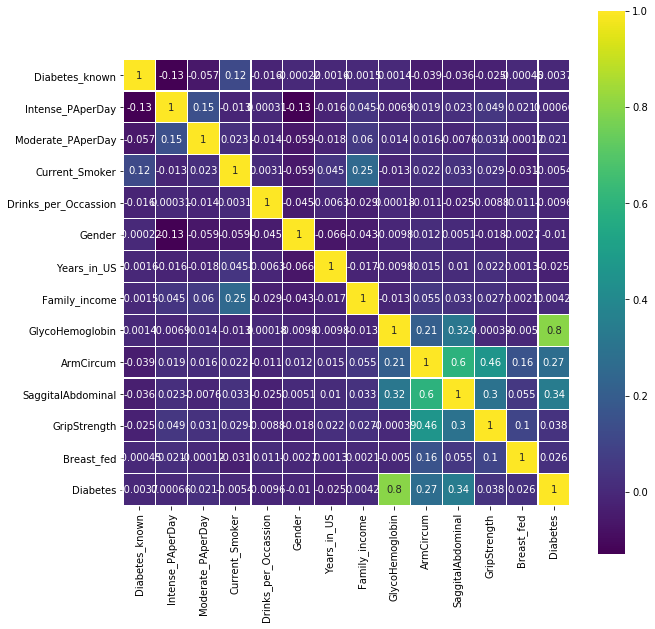

In [51]:
#Notes for cleaning: (Subjects with values inconclusive / not helpful)
#Get rid of all subjects with values that are not 1, 2,or 3 for Diabetes
#Need to turn NaN in data for physical activity to 0.0
#Subjects with values other than 1,2, or 3, for Current_Smoker will be taken out at a later time
#Do BMI calculation with alternative data


df = df.dropna(subset=['Diabetes_known', 'Current_Smoker'])

#df.dropna(axis=1, how='all')
#df.dropna(axis=0, how='all')

df['Intense_PAperDay'] = df['Intense_PAperDay'].fillna(value = 0)
df['Moderate_PAperDay'] = df['Moderate_PAperDay'].fillna(value = 0)

#year in us -> american : 0, not american : 1

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breast_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)





df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 0.5
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 1

df.loc[df['Diabetes_known'] == 2, 'Diabetes_known'] = 0
df.loc[df['Diabetes_known'] == 3, 'Diabetes_known'] = 0.5
df.loc[df['Diabetes_known'] == 9, 'Diabetes_known'] = 0  #Only a single entry

#df.describe()

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

#based on values of heatmap, it is likely high BMI will show very significant correlation with diabetes
#More cleaning and visualizations to come
#Need to merge data from other source
#Make boarderline for diabetes in the middle (not 3, but 0.5) - need to represent data better


In [52]:
#There should be a stronger relationship between Diabetes and Diabetes_known
print(df['Diabetes'].value_counts())
print(df['Diabetes_known'].value_counts())

# print(df['Diabetes_known'])
#Now know that indices are skipped, so can't use indexed for loop
df.reset_index(inplace=True)

i = 0
not_equal = 0
equal = 0
for x in df['Diabetes']:
    if df['Diabetes_known'][i] == x:
        equal += 1
    else:
        not_equal += 1
        
    i += 1
print('Number not equal:')
print(not_equal)
print('Number equal:')
print(equal)

#Turns out IDs do not match up

0.0    2178
1.0     168
0.5     138
Name: Diabetes, dtype: int64
0.0    2056
1.0     350
0.5      78
Name: Diabetes_known, dtype: int64
Number not equal:
657
Number equal:
1827


In [53]:
print(df.head(50))

    index     ID     ID     ID     ID     ID  Diabetes_known  \
0       0  73557  73557  73557  73557  73557             1.0   
1       1  73558  73558  73558  73558  73558             1.0   
2       2  73559  73559  73559  73559  73559             1.0   
3       5  73562  73562  73562  73562  73562             0.0   
4       8  73566  73566  73565  73566  73565             0.0   
5       9  73567  73567  73566  73567  73566             0.0   
6      10  73568  73568  73567  73568  73567             0.0   
7      20  73579  73579  73577  73579  73577             0.0   
8      38  73597  73597  73595  73597  73595             0.0   
9      39  73598  73598  73596  73598  73596             0.0   
10     41  73600  73600  73598  73600  73598             0.0   
11     43  73602  73602  73600  73602  73600             0.0   
12     47  73606  73606  73604  73606  73604             0.0   
13     50  73609  73609  73607  73609  73607             0.0   
14     57  73616  73616  73614  73616  7